In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
X1 = np.array(np.random.randint(0,10, size=100))
X2 = np.array(np.random.randint(10,20, size=100))

In [4]:
X1 = X1.reshape(50,2)
X2 = X2.reshape(50,2)

In [5]:
X1 = pd.DataFrame(X1)
X2 = pd.DataFrame(X2)

In [6]:
#creo una nuova colonna Classe in cui imposto un etichetta al al fine di poter implementare un algoritmo supervisionato
X1['Classe'] = 1
X2['Classe'] = 0

In [28]:
#unisco X1 e X2 in un unico dataset e rinizializzo l'index
df = X1.append(X2).reset_index(drop=True)

In [8]:
#rinomino le colonne del mio dataset per comodità
df.columns = ['valore1', 'valore2', 'classe']

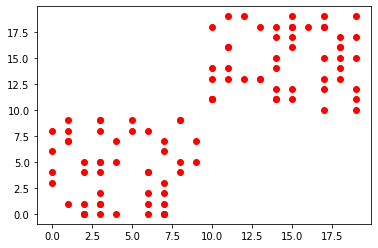

In [9]:
plt.plot(df.valore1, df.valore2, 'ro')

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
model = KNeighborsClassifier(n_neighbors=2, algorithm='auto')

In [12]:
#addestro il modello basato su KNN, prendendo le prime due colonne di df e l'ultima colonna che è la mia label
model.fit(df.iloc[:, :2], df.iloc[:,2])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [13]:
#imposto un seed al fine di verificare come cambiano le predizioni del modello al variare dei parametri del modello KNN
np.random.seed(0)
#creo un nuovo dataset da classificare in base al modello realizzato
z = np.array(np.random.randint(0,20,100))

In [14]:
z = z.reshape(50,2)

In [15]:
z = pd.DataFrame(z, columns=['valore1', 'valore2'])

In [16]:
#creo una nuova colonna Classe e la riempio con i dati predetti
z['classe'] = model.predict(z)

In [17]:
z[(z['classe']==0)].shape

(24, 3)

In [18]:
z[(z['classe']==1)].shape

(26, 3)

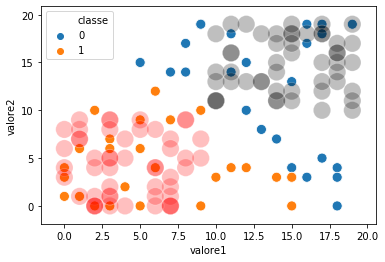

In [27]:
#verifivo in maniera visuale i dati predetti in relazione a quelli originali
#col primo scatterplot visualizzo i dati dell'ultimo Dataset creato e classificato in base al modello addestrato
sns.scatterplot(x='valore1', y='valore2', hue ='classe', data=z, s=100)
#col secondo scatterplot visualizzo i dati originali colorati in base alla classe di appartenenza
sns.scatterplot(x='valore1', y='valore2', hue ='classe', palette=['black','red'], data=df, alpha=0.25, legend=False, marker='o', s=300)
#sns.lmplot(x="valore1", y="valore2", hue="classe",  data=z)
#plt.gca().set_facecolor('xkcd:light orian')
plt.show()

In [ ]:
plt.scatter()